In [ ]:

import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

In [ ]:
# Ścieżka do pliku CSV
beef_path = 'BEEF.csv'

# Wczytanie pliku CSV do DataFrame
beef_df = pd.read_csv(beef_path)

# Wyświetlenie pierwszych kilku wierszy, aby sprawdzić, czy dane zostały poprawnie wczytane
print(beef_df.head())

                       Date  Close         Volume
0  2024-04-03T22:00:00.000Z   6.71  11,698,300.00
1  2024-04-04T22:00:00.000Z   6.62   8,445,700.00
2  2024-04-07T22:00:00.000Z   6.60   7,657,500.00
3  2024-04-08T22:00:00.000Z   6.56   9,762,700.00
4  2024-04-09T22:00:00.000Z   6.46  12,493,000.00


In [ ]:
# DANE WOŁOWNA
beef_data = beef_df['Close']
logret_beef_data =  np.log(beef_data / beef_data.shift(1))



# Ad. 1

## MIARY ZMIENNOŚCI

In [ ]:
def calculate_volatility_metrics(prices, freq=252, window=30):

    log_returns = np.log(prices / prices.shift(1)).dropna()
    
    volatility_metrics = {
        'Stdev (log returns)': np.std(log_returns),
        'Variance (log returns)': np.var(log_returns),
        'Mean Absolute Deviation': np.mean(np.abs(log_returns - np.mean(log_returns))),
        'Annualized Volatility': np.std(log_returns) * np.sqrt(freq),
        'Max Drawdown': (prices / prices.cummax() - 1).min(),
        'Rolling Volatility (last 30d)': log_returns.rolling(window).std().iloc[-1],
        'Skewness': skew(log_returns),
        'Kurtosis': kurtosis(log_returns),
        'Autocorrelation (lag 1)': log_returns.autocorr(lag=1)
    }

    volatility_df = pd.DataFrame.from_dict(volatility_metrics, orient='index', columns=['Value'])
    # W procentach
    volatility_df['Value'] = volatility_df['Value'] * 100
    
    return volatility_df

In [26]:
print(calculate_volatility_metrics(beef_data))

                                    Value
Stdev (log returns)              2.754003
Variance (log returns)           0.075845
VaR (95%)                       -4.087968
CVaR (95%)                      -6.190948
Mean Absolute Deviation          2.050084
Annualized Volatility           43.718438
Max Drawdown                   -46.037736
Rolling Volatility (last 30d)    2.919672
Skewness                        -4.893709
Kurtosis                       152.299560
Autocorrelation (lag 1)         -0.438350


## KWANTYLE

In [29]:
def calculate_quantiles(prices, quantiles=[0.05, 0.25, 0.5, 0.75, 0.95]):

    log_returns = np.log(prices / prices.shift(1)).dropna()

    # Obliczamy kwantyle
    quantile_values = {f"Q{int(q*100)}": prices.quantile(q) for q in quantiles}
    
    return quantile_values

In [30]:
print(calculate_quantiles(beef_data))

{'Q5': 4.5455, 'Q25': 5.505, 'Q50': 6.1, 'Q75': 6.5525, 'Q95': 7.499}


## DYSTRYBUANTA

In [ ]:
def plot_cdf(data, title = ''):
    # Sortowanie danych
    sorted_data = np.sort(data)
    
    # Obliczanie skumulowanego prawdopodobieństwa
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    # Tworzenie wykresu
    plt.figure(figsize=(8, 6))
    plt.plot(sorted_data, cdf, marker='.', linestyle='none', color='blue')
    
    # Dodawanie tytułu i etykiet
    plt.title(f"Dystrybuanta (CDF) {title}")
    plt.xlabel("Wahanie cen")
    plt.ylabel("Prawdopodobieństwo skumulowane")
    plt.grid(True)
    plt.show()

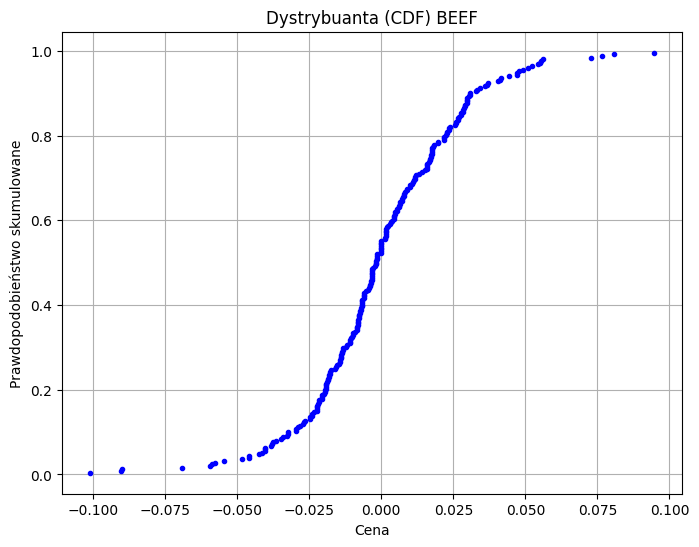

In [36]:
plot_cdf(logret_beef_data, "BEEF")